### Reinforcement Learning (강화 학습)

### 강화학습이란 무엇인가?

 - 강화학습(Reinforcement Learning, RL)은
 - 환경(Environment) 속에서 행동(Action) 을 수행한 결과로 얻는
 - 보상(Reward) 을 기반으로
 - 정책(Policy) 을 스스로 학습하는 알고리즘이다.

#### 강화학습의 특징

 - Label (정답) 이 없음

 - 사람의 정답 데이터가 필요하지 않고
 - 에이전트가 환경과 상호작용하면서 경험만으로 학습한다.
   - 이게 비지도랑은 다른게, 비지도 학습은 정답으로 쓰는 값 자체가 없지만
   - 강화학습은 환경에서 나온 결과를 피드백용으로 쓰기는 한다.

 - 보상은 noisy하고 불완전할 수 있다
  - 단기적으로 높은 점수가 장기적으로 최악이 될 수도 있고
  - 초반 손해가 장기적으로 최고의 전략이 될 수도 있다.

#### 환경은 게임일 필요 없다

 - 행동 후 스코어를 매길 수 있기만 하면 어떤 시스템도 RL 환경이 될 수 있다.
   - (바둑·장기·로봇 팔·물류 최적화·광고 추천·금융 등)
   - 예: 알파고
 - 바둑의 정답을 사람이 알려준 적은 없다.
 - `집 계산 규칙` 이라는 환경 모델만 제공했고,
 - 알파고는 스스로 수천만 판을 두면서 좋은 정책을 학습했다.

| 구성요소            | 역할                |
| --------------- | ----------------- |
| Agent       | 학습을 수행하는 존재       |
| Environment | Agent가 행동하는 세계    |
| State(s)   | 현재 상황             |
| Action(a)   | Agent가 취할 수 있는 선택 |
| Reward(r)   | 행동 결과로 얻는 점수      |
| Policy(π)   | Action을 선택하는 전략   |
| Episode     | 한 판/한 게임          |


(State → Policy(π) → Action → Environment → Reward → Next State) -> Episode

강화학습의 목표는 단순하다.

Return(할인 누적 보상) 을 최대화하는 최적 정책 `π*(a|s)` 를 찾는 것.

Return = 미래 보상의 합
보통 할인감가 γ(0~1)을 곱해서 계산한다.

### 강화학습의 종류
 - RL 알고리즘의 종류

### Valued-based (가치 기반)
 - 상태 또는 (상태, 행동) 쌍의 가치 학습
   - Q-Learning
   - Deep Q-Network (DQN)
     - -> 아타리 게임등을 플레이 할 때는 상태 판단을 위해서 이미지 처리를 이용해야함 (ex. CNN)

### Policy-Based (정책 기반)
 - 정책 π(a|s)를 직접 최적화한다.
 - PPO (ChatGPT 의 RLHF 등에 사용 됨)
  - 연속행동, 확률적 정책에 적합하다.

### 위 두개를 합친 방식
 - A2C, A3C, SAC, TD3...

### 강화학습이 어려운 이유
- 데이터가 독립적으로 분포한것이 아니라, 앞 뒤로 상호 의존적이다.
  - 초창기 상태를 제외하고는, 그 다음 상태부터는 내가 앞에 했던 선택들이 영향을 주게 되어서, 상호 의존적이고, 순서도 중요해진다.
    - 즉 데이터 세트가 독립이 아니다.
- 탐험과 이용의 균형을 잡기 어렵다.
  - 얼마나 도전적인 탐색을 해야하고, 얼마나 지금 내가 알고있는 정보를 활용해야 하는지에 대해서 밸런스를 잡기 어렵다.
- 높은 보상을 얻을 수 있는 경우가 너무 희소하거나, 보상이 지연될 수 있다. (이번 행동이 아니라 좀 더 과거의 행동이 현재의 높은 보상을 야기했을 수 있음)
- 환경과 상호작용 자체가 비용이든다.
- 정책이 바뀌면 데이터도 매번 새로 생성해야 한다.

### 강화학습과 딥러닝의 관계
 - 과거에 강화학습은 실제로 테이블을 사용해서 학습을 했었다. (Tabular Q-learning)
   - 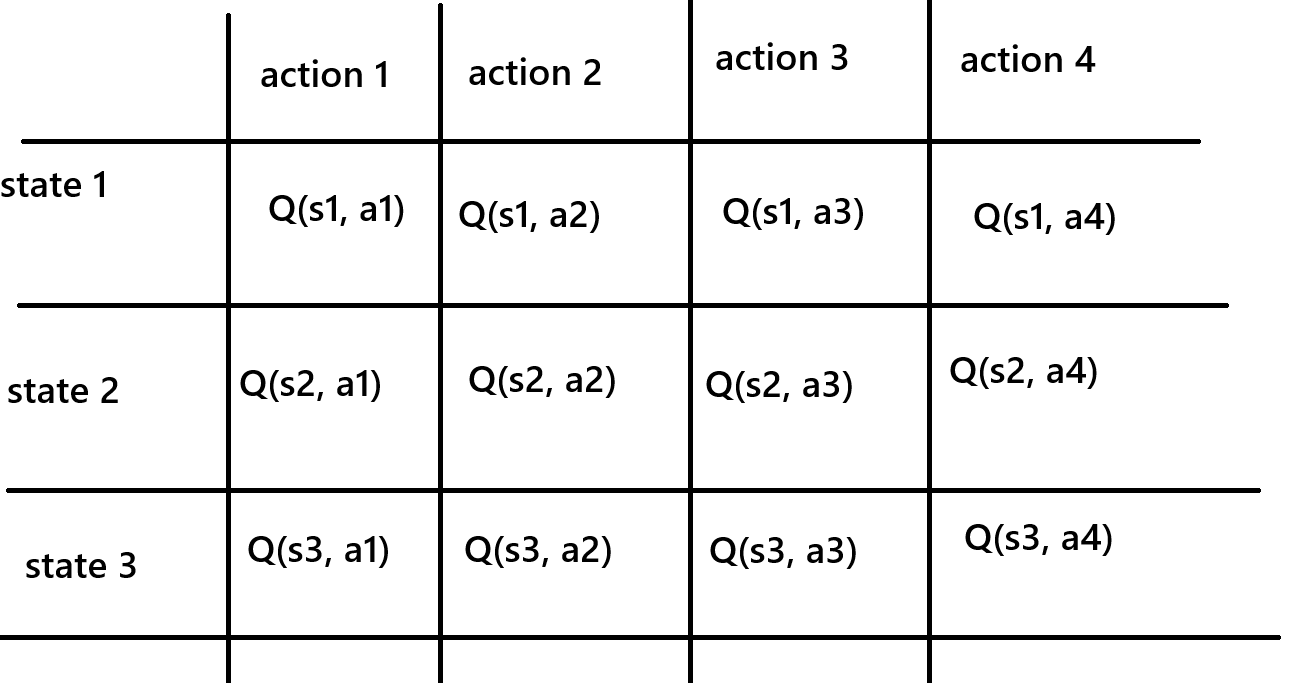
   - 상태 s 에서 행동 a 를 했을 때 기대되는 누적 보상 Q를 계산하는 방식을 배운다.
     - 그렇게 어떤 state 에서 가장 높은 Q 를 반환하는 a 를 선택하는 식으로 동작하기를 기대 하는 것.
 - 하지만 이런 방식은 상태나 행동의 개수가 많아지면 불가능하다.
    - 이미지, 픽셀, 연속적인 센서 값, 복잡한 로봇 관절 상태 등은
    - 테이블로 표현할 수 있는 차원을 훨씬 초과한다.
   - 그래서 s와 a 를 모델로 받아서, 테이블이 아닌 연속 입력도 처리할 수 있는 Deep Learning 기법을 사용해서 입력을 받고,
   - Q 함수도 역시 신경망을 이용해서 결과를 내뱉는 식으로 학습하면서, 여러 데이터에 대해서도 RL 이 가능해졌다.
     - 즉 Q-Table 을 신경망으로 대체한다가 Deep-Q-Network 의 핵심이고 강화학습에다가 딥러닝을 적용한 사례이다.
     - 둘은 배타적인것이 아니라, 서로 다른 개념이고 이렇게 더해져서 사용되고 있다.

- 다음 jupyer 에서 cartpole 을 학습하면서 실제로 강화학습의 동작을 살펴보자.